In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
years = [2016, 2017]

In [3]:
"""This function modifies a data frame 
by adding a new 'Inconnu' column countinng the number of uncounted participants
by transforming all column into a percentage of all participants number
"""
def create_dataframe(lava_data, participants, label_for_others):
    data = pd.DataFrame(lava_data, index=years)
    data = data.fillna(value=0)
    data['Counted'] = data.sum(axis=1)
    df = pd.concat([data, participants], axis=1)
    df[label_for_others] = df['Participants'] - df['Counted']
    df = df.drop(['Counted', 'Participants'], axis=1)
    cols = df.columns
    df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100).round()
    return df
    

Inputs from http://ironman.com

In [4]:
# http://eu.ironman.com/triathlon/coverage/athlete-tracker.aspx?race=worldchampionship&y=201
participants = pd.DataFrame({"Participants":2316, "Participants":2455}, index=years)


Inputs from http://lavamagazine.com/

## Marque des Vélos

In [5]:
# from http://lavamagazine.com/2016bikecount and http://lavamagazine.com/2017-ironman-bike-count
lava_bikes = [
    {'Cervelo':577, 'Trek':261,'Specialized':209,'Felt':139,'Argon 18':106, 
     'Scott':106, 'BMC':100,'Quintana Roo':89,'Cannondale':80,'Giant':70 },
            
    {'Cervelo':570, 'Trek':261,'Specialized':216,'Felt':177,'Argon 18':146, 
    'Canyon':102, 'BMC':101,'Scott':100,'Giant':88,'Quintana Roo':84 }]

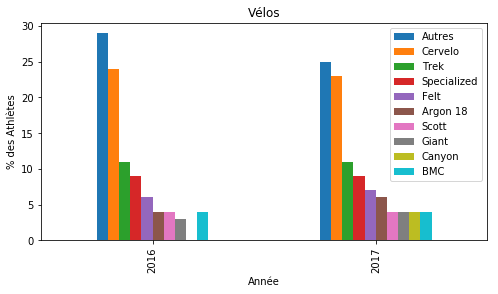

In [6]:
df = create_dataframe(lava_bikes, participants, 'Autres')
df.head()

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Vélos',figsize=(8, 4))
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Marque des GPS

In [7]:
# From Lavamagaz
lava_gps = [{"Garmin":1673, "Polar":85,"Suunto":47,"TomTom":24,"Timex":16,"Fitbit":1},
            {"Garmin":1869, "Polar":91,"Suunto":20,"TomTom":9,"Smart Watches":5}]

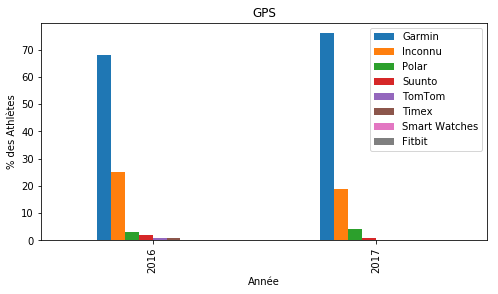

In [8]:
df = create_dataframe(lava_gps, participants, 'Inconnu')

top = df.loc[2017].sort_values(ascending=False).index
df = df[top]

ax = df.plot.bar(title='GPS',figsize=(8, 4))
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Marque des chaussures

In [9]:
lava_shoes = [{'Asics':17.0, 'Hoka':16, 'Saucony':13, 'Brooks':8, 'New Balance':8, 'Newton':8,
              'Adidas':7, 'Nike':6, 'Mizuno':5, 'On':4, 'Zoot':3, 'Skechers':2, 'Altra':2,
              'Others':1},
              {'Hoka':18.1, 'Saucony':12.6, 'Asics': 12.4, 'Brooks':8.5, 'New Balance':8.0, 'Adidas':7.3, 
               'On':6.9, 'Nike':5.7, 'Newton':5.4, 'Mizuno':4.4, 'Skechers':3.7, 'Altra': 2.0, 
               'Salming':1.3, 'Zoot':1.3, 'Under Armor':0.004, 'Puma':0.002, 'Scott':.002, 'Pearl Izumi':0.002, 
               'Inov-8':0.002, 'Vibram':0.0005, 'Kswiss':0.0005, 'Merrel':0.0005, 'Other':0.002}]

In [10]:
lava_shoes = [{'Asics':17.0, 'Hoka':16, 'Saucony':13, 'Brooks':8, 'New Balance':8, 'Newton':8,
              'Adidas':7, 'Nike':6, 'Mizuno':5, 'On':4, 'Zoot':3, 'Skechers':2, 'Altra':2,
              'Others':1},
              {'Hoka':18.1, 'Saucony':12.6, 'Asics': 12.4, 'Brooks':8.5, 'New Balance':8.0, 'Adidas':7.3, 
               'On':6.9, 'Nike':5.7, 'Newton':5.4, 'Mizuno':4.4, 'Skechers':3.7, 'Altra': 2.0, 
               'Salming':1.3, 'Zoot':1.3, 'Others':1}]

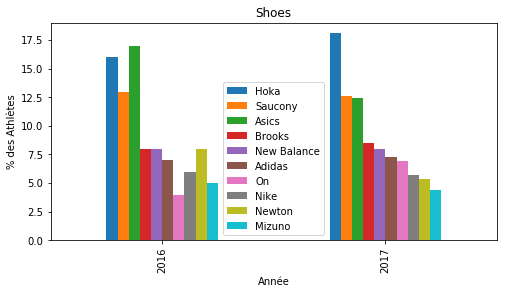

In [11]:
df = pd.DataFrame(lava_shoes, index=years)
df = df.fillna(value=0)
df.head()

# discard any brand which is not is the top-10 brands
# otherwise, chart will be diffcult to read
top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Shoes', figsize=(8, 4))
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')